In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

print("Libraries Imported")

# Định nghĩa đường dẫn cục bộ thay vì Google Drive
train_folder = r'C:\Users\taing\Downloads\SmartHealth\AI_Predict\dataset\train'
test_folder = r'C:\Users\taing\Downloads\SmartHealth\AI_Predict\dataset\test'
validate_folder = r'C:\Users\taing\Downloads\SmartHealth\AI_Predict\dataset\valid'

IMAGE_SIZE = (350, 350)

print("Reading training images from:", train_folder)
print("Reading validation images from:", validate_folder)

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 8

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical'
)

Libraries Imported
Reading training images from: C:\Users\taing\Downloads\SmartHealth\AI_Predict\dataset\train
Reading validation images from: C:\Users\taing\Downloads\SmartHealth\AI_Predict\dataset\valid
Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [3]:


learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience=5, verbose=2, factor=0.5, min_lr=0.000001)
early_stops = EarlyStopping(monitor='loss', min_delta=0, patience=6, verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath='best_model.h5', verbose=2, save_best_only=True, save_weights_only=False)
OUTPUT_SIZE = 4

pretrained_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False

model = Sequential()
model.add(pretrained_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(OUTPUT_SIZE, activation='softmax'))

print("Pretrained model used:")
pretrained_model.summary()

print("Final model created:")
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=50,
    callbacks=[learning_rate_reduction, early_stops, checkpointer],
    validation_data=validation_generator,
    validation_steps=20
)


Pretrained model used:


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 350, 350,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 174, 174,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 174, 174,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 174, 174,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 172, 172,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 172, 172,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 172, 172,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 172, 172,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 172, 172,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 172, 172,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 172, 172,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 172, 172,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 86, 86,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 86, 86,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 86, 86,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 86, 86,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 86, 86,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Final model created:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 11, 11, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,869,676 (79.61 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - accuracy: 0.4129 - loss: 1.2879
Epoch 1: val_loss improved from inf to 1.11588, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4147 - loss: 1.2851 - val_accuracy: 0.4875 - val_loss: 1.1159 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.5230 - loss: 1.0417
Epoch 2: val_loss improved from 1.11588 to 0.97103, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5246 - loss: 1.0400 - val_accuracy: 0.5938 - val_loss: 0.9710 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.5870 - loss: 0.9540
Epoch 3: val_loss improved from 0.97103 to 0.87484, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5861 - loss: 0.9543 - val_accuracy: 0.6187 - val_loss: 0.8748 - learning_rate: 0.0010
Epoch 4/50
 2/25 ━━━━━━━━━━━━━━━━━━━━ 19s 840ms/step - accuracy: 0.6875 - loss: 0.8534
Epoch 4: val_loss did not improve from 0.87484
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 724ms/step - accuracy: 0.6300 - loss: 0.8935 - val_accuracy: 0.5500 - val_loss: 0.9620 - learning_rate: 0.0010
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.6622 - loss: 0.8820
Epoch 5: val_loss did not improve from 0.87484
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6623 - loss: 0.8822 - val_accuracy: 0.6000 - val_loss: 0.9138 - learning_rate: 0.0010
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 853ms/step - accuracy: 0.6701 - loss: 0.8824
Epoch 6: val_loss did not improve from 0.87484
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6703 - loss: 0.8807 - val_accuracy: 0.5188 - val_loss: 0.9020 - learning_rate: 0.0010
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 

25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6006 - loss: 0.8705 - val_accuracy: 0.5875 - val_loss: 0.8444 - learning_rate: 0.0010
Epoch 8/50
 2/25 ━━━━━━━━━━━━━━━━━━━━ 19s 849ms/step - accuracy: 0.6250 - loss: 0.7210
Epoch 8: val_loss improved from 0.84436 to 0.80730, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 740ms/step - accuracy: 0.6250 - loss: 0.8560 - val_accuracy: 0.6687 - val_loss: 0.8073 - learning_rate: 0.0010
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.7467 - loss: 0.7223
Epoch 9: val_loss did not improve from 0.80730
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7456 - loss: 0.7232 - val_accuracy: 0.6062 - val_loss: 0.8647 - learning_rate: 0.0010
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.7237 - loss: 0.7321
Epoch 10: val_loss did not improve from 0.80730
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7236 - loss: 0.7311 - val_accuracy: 0.5938 - val_loss: 0.8583 - learning_rate: 0.0010
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 828ms/step - accuracy: 0.7896 - loss: 0.6598
Epoch 11: val_loss did not improve from 0.80730
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7883 - loss: 0.6595 - val_accuracy: 0.6062 - val_loss: 0.8496 - learning_rate: 0.0010
Epoch 12/50
 2/25 ━━━━━━━━━━━━━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 905ms/step - accuracy: 0.6250 - loss: 0.7314 - val_accuracy: 0.6687 - val_loss: 0.7560 - learning_rate: 0.0010
Epoch 17/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.8440 - loss: 0.5298
Epoch 17: val_loss improved from 0.75596 to 0.74669, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8424 - loss: 0.5322 - val_accuracy: 0.6187 - val_loss: 0.7467 - learning_rate: 0.0010
Epoch 18/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.7991 - loss: 0.5299
Epoch 18: val_loss did not improve from 0.74669
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7989 - loss: 0.5312 - val_accuracy: 0.6250 - val_loss: 0.7561 - learning_rate: 0.0010
Epoch 19/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 971ms/step - accuracy: 0.7488 - loss: 0.6149
Epoch 19: val_loss improved from 0.74669 to 0.69296, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7499 - loss: 0.6134 - val_accuracy: 0.6562 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 20/50
 2/25 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9062 - loss: 0.6777
Epoch 20: val_loss did not improve from 0.69296
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 764ms/step - accuracy: 0.9350 - loss: 0.6071 - val_accuracy: 0.6250 - val_loss: 0.7453 - learning_rate: 0.0010
Epoch 21/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.8093 - loss: 0.5015
Epoch 21: val_loss did not improve from 0.69296
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8090 - loss: 0.5031 - val_accuracy: 0.6187 - val_loss: 0.8355 - learning_rate: 0.0010
Epoch 22/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 931ms/step - accuracy: 0.7890 - loss: 0.5543
Epoch 22: val_loss did not improve from 0.69296
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7880 - loss: 0.5548 - val_accuracy: 0.6313 - val_loss: 0.7554 - learning_rate: 0.0010
Epoch 23/50
25/25 ━━━━━━━━━━━━━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8949 - loss: 0.4696 - val_accuracy: 0.7188 - val_loss: 0.6441 - learning_rate: 0.0010
Epoch 31/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - accuracy: 0.9114 - loss: 0.4043
Epoch 31: val_loss did not improve from 0.64411
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9104 - loss: 0.4051 - val_accuracy: 0.7125 - val_loss: 0.6737 - learning_rate: 0.0010
Epoch 32/50
 2/25 ━━━━━━━━━━━━━━━━━━━━ 21s 948ms/step - accuracy: 0.7812 - loss: 0.4617
Epoch 32: val_loss did not improve from 0.64411
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 855ms/step - accuracy: 0.8100 - loss: 0.4818 - val_accuracy: 0.6812 - val_loss: 0.6963 - learning_rate: 0.0010
Epoch 33/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.8653 - loss: 0.4363
Epoch 33: val_loss did not improve from 0.64411
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8644 - loss: 0.4379 - val_accuracy: 0.6687 - val_loss: 0.6789 - learning_rate: 0.0010
Epoch 34/50
25/25 ━━━━━━━━━━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8782 - loss: 0.4504 - val_accuracy: 0.7250 - val_loss: 0.6300 - learning_rate: 0.0010
Epoch 36/50
 2/25 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9375 - loss: 0.4087
Epoch 36: val_loss did not improve from 0.63001
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 911ms/step - accuracy: 0.8800 - loss: 0.4768 - val_accuracy: 0.7188 - val_loss: 0.7006 - learning_rate: 0.0010
Epoch 37/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 901ms/step - accuracy: 0.9104 - loss: 0.4287
Epoch 37: val_loss did not improve from 0.63001
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9102 - loss: 0.4278 - val_accuracy: 0.6938 - val_loss: 0.6532 - learning_rate: 0.0010
Epoch 38/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - accuracy: 0.8938 - loss: 0.3957
Epoch 38: val_loss did not improve from 0.63001
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.8946 - loss: 0.3937 - val_accuracy: 0.6938 - val_loss: 0.6878 - learning_rate: 0.0010
Epoch 39/50
25/25 ━━━━━━━━━━━━━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 1.0000 - loss: 0.2247 - val_accuracy: 0.7625 - val_loss: 0.5810 - learning_rate: 5.0000e-04
Epoch 45/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9120 - loss: 0.3803
Epoch 45: val_loss did not improve from 0.58099
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9117 - loss: 0.3798 - val_accuracy: 0.6313 - val_loss: 0.7378 - learning_rate: 5.0000e-04
Epoch 46/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8872 - loss: 0.3879
Epoch 46: val_loss did not improve from 0.58099
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8879 - loss: 0.3871 - val_accuracy: 0.7188 - val_loss: 0.7046 - learning_rate: 5.0000e-04
Epoch 47/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9593 - loss: 0.3783
Epoch 47: val_loss did not improve from 0.58099
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9584 - loss: 0.3781 - val_accuracy: 0.6750 - val_loss: 0.6804 - learning_rate: 5.0000e-04
Epoch 48/50
 2/25 ━━━━━━━━━━━━━━

Model saved successfully as 'trained_model.h5'
Final training accuracy = 0.9399999976158142
Final testing accuracy = 0.75


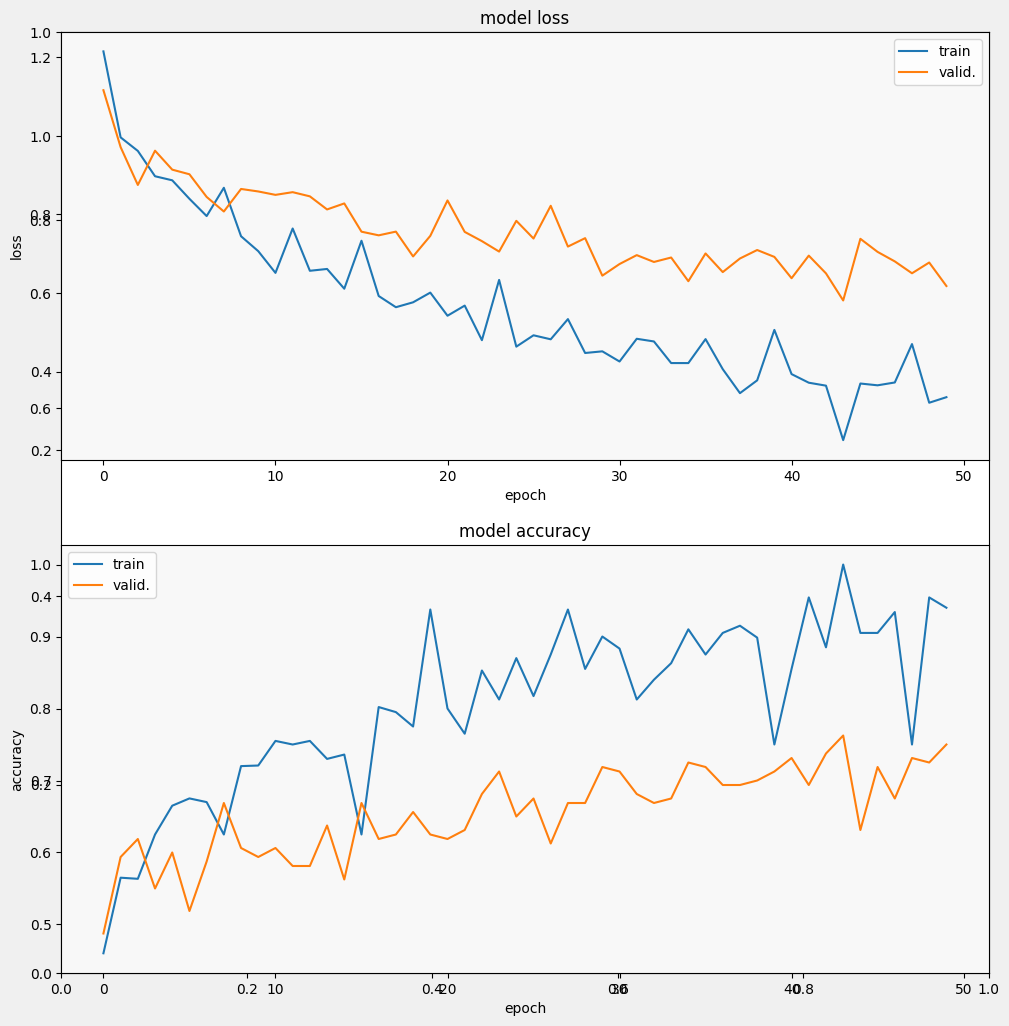

In [5]:

# Lưu mô hình sau khi train
model.save("trained_model.h5")
print("Model saved successfully as 'trained_model.h5'")

print("Final training accuracy =", history.history['accuracy'][-1])
print("Final testing accuracy =", history.history['val_accuracy'][-1])

def display_training_curves(training, validation, title, subplot):
    if subplot % 10 == 1:
        plt.subplots(figsize=(10, 10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model ' + title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
The image belongs to class: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


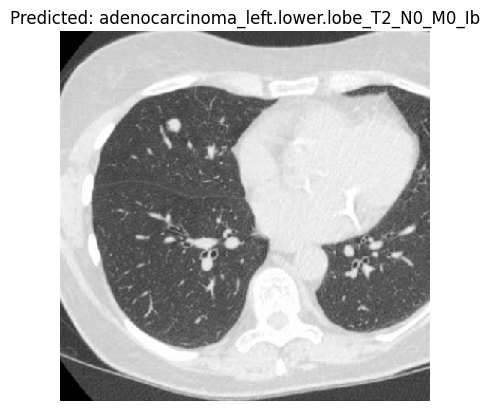

In [8]:

from tensorflow.keras.preprocessing import image

# Dự đoán hình ảnh mới
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale hình ảnh giống như khi train
    return img_array

def predict_image(img_path):
    img = load_and_preprocess_image(img_path, IMAGE_SIZE)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]
    print(f"The image belongs to class: {predicted_label}")
    plt.imshow(image.load_img(img_path, target_size=IMAGE_SIZE))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Ví dụ dự đoán
predict_image("OIP.jpg")